<a href="https://colab.research.google.com/github/mmorari-cmyk/CURSO_SE.ALES_Y_SISTEMAS/blob/main/Taller2/1_7_APLICACION_de_CIRCUITOS_ELECTRICOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.7

Aplicación en circuitos eléctricos - potencia. Consulte en qué consiste la distorsión total de armónicos (Total Harmonic Distortion - THD) y el factor de potencia en un circuito eléctrico. ¿Cómo puede calcularse el THD desde la FFT?. ¿Cómo puede calcularse la distorsión del factor de potencia con base al THD?. Genere un ejemplo ilustrativo para el cálculo del THD y la distorsión del factor de potencia para un rectificador de onda completa con carga: i) netamente resistiva y ii) carga RC en serie. Establezca las condiciones necesarias para las simulaciones y pruebe con diferentes valores de R y C. Discuta los resultados obtenidos. Ver cuaderno Rectificador RC y THD.

### **Aplicación en circuitos eléctricos - potencia**

A continuación, se detalla en qué consiste la distorsión total de armónicos (THD) y el factor de potencia, y cómo se relacionan entre sí.


### **¿En qué consiste la distorsión total de armónicos (Total Harmonic Distortion - THD)?**

La **Distorsión Armónica Total (THD)** es una medida que cuantifica qué tan deformada está una forma de onda de corriente alterna (CA) con respecto a su forma ideal, que es una sinusoide perfecta. Esta deformación es causada por la presencia de **armónicos**, que son señales sinusoidales con frecuencias que son múltiplos enteros de la frecuencia fundamental (normalmente 50 o 60 Hz).

El THD se expresa como un porcentaje y compara la energía de todos los armónicos con la energía de la componente fundamental. Un THD bajo indica una señal de alta calidad, mientras que un THD alto significa que la señal está muy distorsionada.

**Aplicación en circuitos de potencia:**
En los sistemas eléctricos, un THD elevado (especialmente en la corriente) puede causar problemas serios como:
*   **Sobrecalentamiento** de cables, transformadores y motores.
*   **Disparos intempestivos** de interruptores automáticos.
*   **Reducción de la vida útil** de los equipos.
*   **Baja eficiencia** del sistema eléctrico.


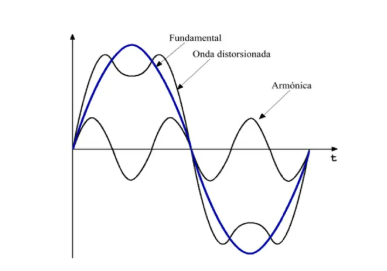


### **¿Qué es el factor de potencia en un circuito eléctrico?**

El **factor de potencia (FP)** es una medida de la eficiencia con la que se utiliza la energía eléctrica. Se define como la relación entre la **potencia activa (P)**, que es la que realiza un trabajo útil (luz, calor, movimiento), y la **potencia aparente (S)**, que es la potencia total que la red eléctrica debe suministrar.

Un factor de potencia ideal es 1 (o 100%), lo que significa que toda la energía suministrada se aprovecha. Un factor de potencia bajo indica que una parte significativa de la energía se desperdicia en forma de **potencia reactiva (Q)**, necesaria para crear campos magnéticos en motores o transformadores, pero que no produce trabajo útil. Las compañías eléctricas a menudo penalizan a los usuarios con un bajo factor de potencia.




### **¿Cómo puede calcularse el THD desde la FFT?**

La **Transformada Rápida de Fourier (FFT)** es el método estándar para calcular el THD. La FFT descompone una señal del dominio del tiempo en sus componentes de frecuencia individuales, permitiendo identificar la magnitud de la frecuencia fundamental y de cada uno de sus armónicos.


Con los valores de frecuencia en Hz y el espectro cálculado como arreglo de numpy, se puede calcular la distorsión total de armónicos (THD)
$$THD = \frac{\sqrt{V_2^2+V_3^2+\cdots V_n^2}}{V_1}$$

donde $V_n$ es el valor del $n$-th armónico de la señal de salida del circuito (en términos de tensión) y $V_1$ es la componente (armónico fundamental).



### **¿Cómo puede calcularse la distorsión del factor de potencia con base al THD?**

La presencia de armónicos introduce una componente de distorsión en el factor de potencia. Esta componente, conocida como **factor de potencia de distorsión**, se puede calcular directamente a partir del THD de la corriente (THD).

La fórmula es la siguiente:

$$
PF_{TDH} = \frac{1}{\sqrt{1 + (THD)^2}}
$$

Donde el THD debe expresarse en su valor por unidad (por ejemplo, si el THD es del 25%, se usa 0.25 en la fórmula). Este cálculo muestra cómo la distorsión armónica, por sí sola, degrada la eficiencia en el uso de la energía.

 RECTIFICADOR DE ONDA COMPLETA

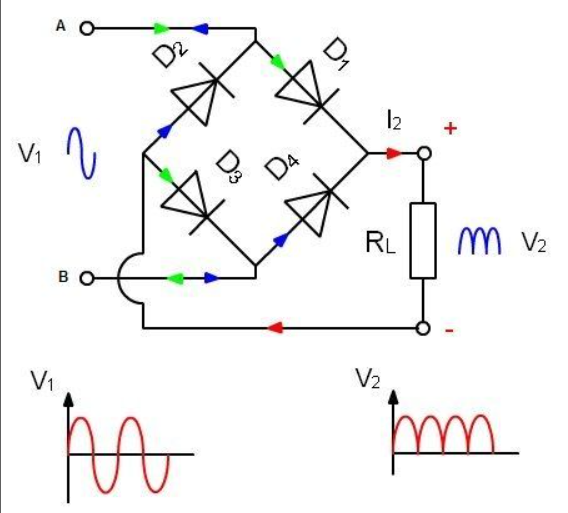

Para simular un rectificador de onda completa se reemplazará este circuito por una entada de tensión senoidal rectificada



##Carga netamente resistiva

- Para este caso, el circuito responde a:

$V_R(s) =R I_{in}(s)$

$\frac{V_R(s)}{V_{in}(s)}=1$

In [ ]:
#paquetes de para simulación
import numpy as np
import scipy
import matplotlib.pyplot as plt
#%matplotlib inline
import scipy.signal as sig
import scipy.optimize as opt
#from IPython.display import Image
import sympy as sym
#sym.init_session()

In [ ]:
R_v=float(input("Ingrese el valor de R: "))

Ingrese el valor de R: 1000


In [ ]:
# Make sure to run the cell above that imports numpy as np
num = np.array([1]) #coeficientes del numerador de la funcion de transferencia como numpy array
den = np.array([0,1])#coeficientes del denominador de la funcion de transferencia como numpy array
G_n = sig.TransferFunction(num, den) #funcion de transferencia en
print(num)
print(den)

[1]
[0 1]


In [ ]:
Fo = 60 #frec alimentación
Fs = 30*Fo #frecuencia muestreo
To = 1/Fo #periodo fundamental
Ts = 1/Fs #periodo muestreo
t = np.arange(0, 5*To,Ts) # se simulan 5 peridos de alimentación con un muestreo segun Ts
A = 120 #amplitud entrada
#función de entrada aproximada como onda senoidal rectificada completa
in_o = A*(np.sin(2*np.pi*Fo*t))
rec_c = sig.square(2 * np.pi * Fo * t)  # Tren de pulsos para la señal rectificada completa
in_ = in_o * rec_c  # Entrada rectificada completa
#in_ = np.abs(in_o) #señal rectificada
out = G_n.output(in_, T=t)[1] #evaluar salida ante entrada rectificada mediante aproximacion numérica de scipy

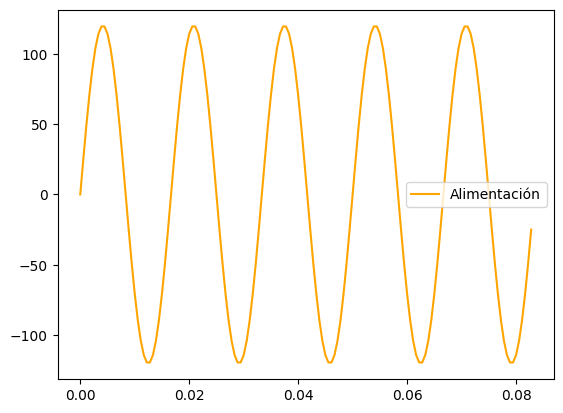

In [ ]:
#señales de alimentación
plt.plot(t,in_o,label='Alimentación', color='orange')
plt.legend()
plt.show()

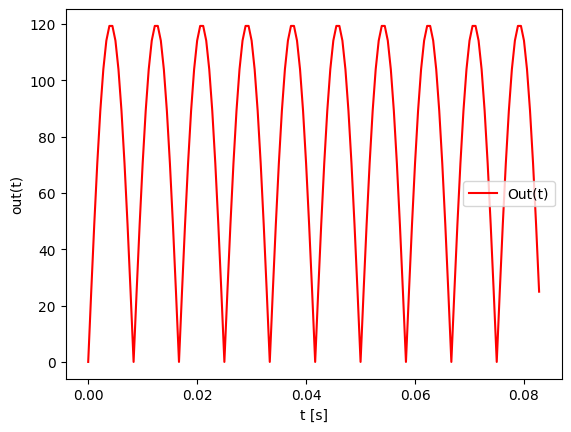

In [ ]:
#plt.plot(t, in_,label='In(t)')#entrada rectificada
plt.plot(t, out,label='Out(t)' , color="red")#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.legend()
plt.show()

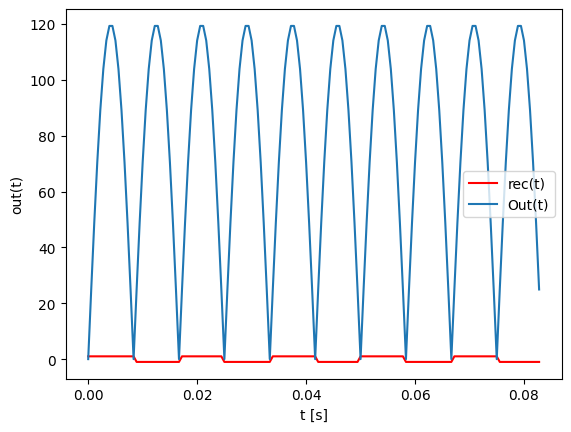

In [ ]:
#plt.plot(t, in_,label='In(t)')#entrada rectificada
plt.plot(t, rec_c,c="r",label='rec(t)')
plt.plot(t, out,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.legend()
plt.show()

Dado que la resistencia es un elemento que no almacena energía, el voltaje de salida es igual al voltaje de entrada.


#Calculo del espectro ⏬

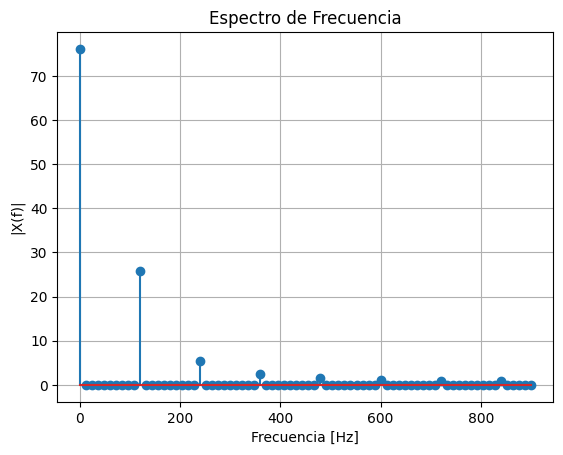

In [ ]:
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out)

# Visualizar el espectro de frecuencias
plt.stem(vfre, abs(Xf) / len(out))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|X(f)|')
plt.title('Espectro de Frecuencia')
plt.grid()
plt.show()

##Calcular THD y factor de potencia

In [ ]:
# Cálculo del THD
def calcular_thd(signal, Fs):
    Xf = np.fft.rfft(signal)  # FFT de la señal
    magnitudes = np.abs(Xf)
    freqs = np.fft.rfftfreq(len(signal), 1 / Fs)

    # Identificar la frecuencia fundamental
    fundamental_idx = np.argmax(magnitudes)
    fundamental = magnitudes[fundamental_idx]

    # Cálculo del THD como la suma de los armónicos sobre la fundamental
    thd = np.sqrt(np.sum(magnitudes[1:]**2)) / fundamental
    return thd

In [ ]:
# Cálculo del THD para el circuito R
thd_r = calcular_thd(out, Fs)
print(f"THD del circuito con carga resistiva: {thd_r * 100:.2f}%")

THD del circuito con carga resistiva: 34.84%


In [ ]:
pf=np.sqrt(1/(1+(thd_r)**2))
print(f"El factor de potencia de la señal con carga resistiva: {pf:.4f}")

El factor de potencia de la señal con carga resistiva: 0.9443


##Carga RC

- En este caso, el circuito responde a:

$ \frac{V_o(s)}{V_i(s)} =\frac{1}{RCs+1}$



In [ ]:
R_v=float(input("Ingrese el valor de R: "))
C_v=float(input("Ingrese el valor de C: "))

# Función de transferencia del circuito RC
num = np.array([1])
den = np.array([R_v * C_v, 1])
G_n = sig.TransferFunction(num, den)
out = G_n.output(in_, T=t)[1] #evaluar salida ante entrada rectificada mediante aproximacion numérica de scipy

Ingrese el valor de R: 1000
Ingrese el valor de C: 10e-6


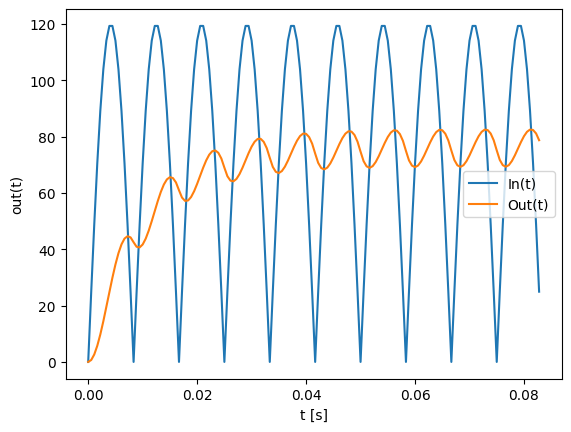

In [ ]:
#GRAFICA
plt.plot(t, in_,label='In(t)')#entrada rectificada
plt.plot(t, out,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.legend()
plt.show()

##Cálculo del espectro

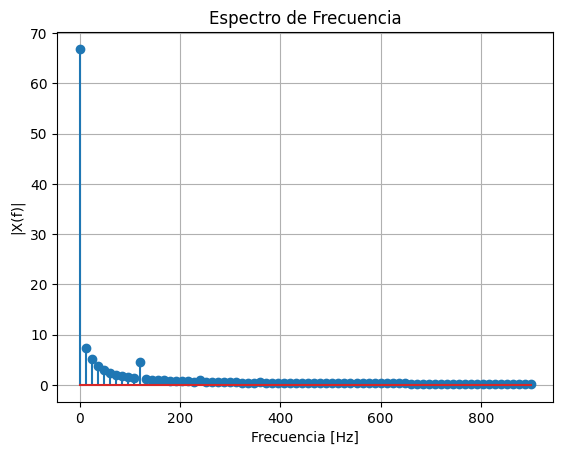

In [ ]:
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out)

# Visualizar el espectro de frecuencias
plt.stem(vfre, abs(Xf) / len(out))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|X(f)|')
plt.title('Espectro de Frecuencia')
plt.grid()
plt.show()

##Cálculo del THD

In [ ]:
# Cálculo del THD
def calcular_thd(signal, Fs):
    Xf = np.fft.rfft(signal)  # FFT de la señal
    magnitudes = np.abs(Xf)
    freqs = np.fft.rfftfreq(len(signal), 1 / Fs)

    # Identificar la frecuencia fundamental
    fundamental_idx = np.argmax(magnitudes)
    fundamental = magnitudes[fundamental_idx]

    # Cálculo del THD como la suma de los armónicos sobre la fundamental
    thd = np.sqrt(np.sum(magnitudes[1:]**2)) / fundamental
    return thd

In [ ]:
# Cálculo del THD para el circuito RC (con filtro)
thd_rc = calcular_thd(out, Fs)
print(f"THD del circuito RC: {thd_rc * 100:.2f}%")

THD del circuito RC: 18.68%


In [ ]:
pf=np.sqrt(1/(1+(thd_rc)**2))
print(f"El factor de potencia de la señal con carga RC: {pf:.4f}")

El factor de potencia de la señal con carga RC: 0.9830
